# Projet: Aide à la décision multicritère pour le choix d'un logement étudiant à Besançon

# Problème
 
Choisir un appartement parmi une multitude d'options. Cette décision doit être prise en tenant compte de plusieurs critères importants qui sont : 

- **Adresse** : L'emplacement du logement (rue et numéro). 
- **Type** : Le type de logement, soit un T1 ou une colocation.
- **Prix** : Le coût mensuel du logement en euros.
- **Surface** : La superficie du logement en mètres carrés.
- **DistanceFac** : La distance entre le logement et la faculté, mesurée en kilomètres.
- **ProximiteBus** : La proximité des arrêts de bus, mesurée en nombre de minutes à pied.
- **DureeBus** : La durée du trajet en bus entre le logement et la faculté, exprimée en minutes.
- **ProximiteCV** : La proximité du centre-ville de Besançon, mesurée en kilomètres.
- **Etat** : L'état général du logement, classé de "À rénover" à "Très bon état".
- **CommentairesSupplementaires** : Commentaires supplémentaires sur le logement.



## Chargement des packages

In [2]:
using Pkg
Pkg.activate("./MCDA")
using MCDA, DataFrames, CSV, GraphViz

  Activating project at `~/Desktop/Master 2 /UBS/Méthodes Numériques 2 /TP/MCDA`


## Chargement des données

In [3]:
df = CSV.read("appartement.csv", DataFrame, copycols=true) 

Row,Adresse,Type,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,Etat,CommentairesSupplementaires
,String31,String15,Int64,Int64,Float64,Int64,Int64,Float64,String15,String31
1,12 Rue des Roses,T1,450,20,2.5,5,15,1.5,Bon état,Près du parc
2,34 Avenue de la République,T1,410,22,3.0,3,12,2.0,Assez bien,Proche commerces
3,7 Boulevard de la Liberté,Colocation,450,18,1.8,8,20,3.0,À rénover,Aucun commerce à proximité
4,56 Rue du Moulin,T1,430,21,2.0,4,14,1.7,Très bon état,Appartement lumineux
5,23 Place de la Gare,Colocation,350,17,3.2,7,18,2.2,Bon état,Près des transports
6,3 Rue de la République,T1,550,19,2.3,6,16,1.8,Assez bien,En étage élevé
7,20 Rue Pasteur,T1,360,23,3.5,5,13,1.9,Bon état,Appartement calme
8,15 Rue des Jardins,Colocation,470,20,2.8,5,17,2.5,Très bon état,Cuisine équipée
9,6 Rue de l'École,T1,480,21,2.1,4,12,1.6,Bon état,Proche commerces


Nous allons ici ignorer les colonnes contenant des informations supplémentaires, car certaines d'entre elles sont redondantes. Par exemple, l'information 'Près des transports' est similaire à celle fournie par la variable(critères) 'ProximiteBus'. Aussi pour facitlié les travail on va transfirmé la variables états en variable numérique (0-5)  et la variable 'Type' en boolen comme suit:
- À rénover : 1
- Assez bien : 3
- Bon état : 4
- Très bon état : 5

- Colocation : 0
- T1 : 1


In [4]:
 df = df[:,1:9]

Row,Adresse,Type,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,Etat
,String31,String15,Int64,Int64,Float64,Int64,Int64,Float64,String15
1,12 Rue des Roses,T1,450,20,2.5,5,15,1.5,Bon état
2,34 Avenue de la République,T1,410,22,3.0,3,12,2.0,Assez bien
3,7 Boulevard de la Liberté,Colocation,450,18,1.8,8,20,3.0,À rénover
4,56 Rue du Moulin,T1,430,21,2.0,4,14,1.7,Très bon état
5,23 Place de la Gare,Colocation,350,17,3.2,7,18,2.2,Bon état
6,3 Rue de la République,T1,550,19,2.3,6,16,1.8,Assez bien
7,20 Rue Pasteur,T1,360,23,3.5,5,13,1.9,Bon état
8,15 Rue des Jardins,Colocation,470,20,2.8,5,17,2.5,Très bon état
9,6 Rue de l'École,T1,480,21,2.1,4,12,1.6,Bon état


In [5]:
# Transformation de 'État' en numérique (0-5)
df[!, :EtatNum] = [
    x == "À rénover" ? 1 :
    x == "Assez bien" ? 3 :
    x == "Bon état" ? 4 :
    x == "Très bon état" ? 5 : 0 for x in  df.Etat
]

# Transformation de 'Type' en booléen (0 pour Colocation, 1 pour T1)
df[!, :TypeB] = [x == "Colocation" ? 0 : 1 for x in df.Type]

25-element Vector{Int64}:
 1
 1
 0
 1
 0
 1
 1
 0
 1
 0
 1
 1
 0
 1
 1
 0
 1
 1
 0
 1
 0
 1
 0
 1
 1

In [6]:
df

Row,Adresse,Type,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,Etat,EtatNum,TypeB
,String31,String15,Int64,Int64,Float64,Int64,Int64,Float64,String15,Int64,Int64
1,12 Rue des Roses,T1,450,20,2.5,5,15,1.5,Bon état,4,1
2,34 Avenue de la République,T1,410,22,3.0,3,12,2.0,Assez bien,3,1
3,7 Boulevard de la Liberté,Colocation,450,18,1.8,8,20,3.0,À rénover,1,0
4,56 Rue du Moulin,T1,430,21,2.0,4,14,1.7,Très bon état,5,1
5,23 Place de la Gare,Colocation,350,17,3.2,7,18,2.2,Bon état,4,0
6,3 Rue de la République,T1,550,19,2.3,6,16,1.8,Assez bien,3,1
7,20 Rue Pasteur,T1,360,23,3.5,5,13,1.9,Bon état,4,1
8,15 Rue des Jardins,Colocation,470,20,2.8,5,17,2.5,Très bon état,5,0
9,6 Rue de l'École,T1,480,21,2.1,4,12,1.6,Bon état,4,1


On sélectionne à présent les colones numériques.

In [7]:
data = select!(df, Not(:Type, :Etat))

Row,Adresse,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,EtatNum,TypeB
,String31,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Int64
1,12 Rue des Roses,450,20,2.5,5,15,1.5,4,1
2,34 Avenue de la République,410,22,3.0,3,12,2.0,3,1
3,7 Boulevard de la Liberté,450,18,1.8,8,20,3.0,1,0
4,56 Rue du Moulin,430,21,2.0,4,14,1.7,5,1
5,23 Place de la Gare,350,17,3.2,7,18,2.2,4,0
6,3 Rue de la République,550,19,2.3,6,16,1.8,3,1
7,20 Rue Pasteur,360,23,3.5,5,13,1.9,4,1
8,15 Rue des Jardins,470,20,2.8,5,17,2.5,5,0
9,6 Rue de l'École,480,21,2.1,4,12,1.6,4,1


On sépare les noms des alternatives du tableau de performance.

In [8]:
nom = data[:,1]
alt = data[:,2:end]

Row,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,EtatNum,TypeB
,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Int64
1,450,20,2.5,5,15,1.5,4,1
2,410,22,3.0,3,12,2.0,3,1
3,450,18,1.8,8,20,3.0,1,0
4,430,21,2.0,4,14,1.7,5,1
5,350,17,3.2,7,18,2.2,4,0
6,550,19,2.3,6,16,1.8,3,1
7,360,23,3.5,5,13,1.9,4,1
8,470,20,2.8,5,17,2.5,5,0
9,480,21,2.1,4,12,1.6,4,1


Définition de l'échelle

In [9]:
# Définir l'échelle pour chaque critère en fonction de son type et direction de préférence
scales = Dict(
    "Prix" => Scale(prefDirection = MCDA.DEC),                # Moins cher est préférable
    "Surface" => Scale(prefDirection = MCDA.INC),             # Plus grand est préférable
    "DistanceFac" => Scale(prefDirection = MCDA.DEC),         # Moins loin est préférable
    "ProximiteBus" => Scale(prefDirection = MCDA.DEC),        # Plus proche est préférable
    "DureeBus" => Scale(prefDirection = MCDA.DEC),            # Moins de durée est préférable
    "ProximiteCV" => Scale(prefDirection = MCDA.INC),         # Plus proche est préférable
    "EtatNum" => Scale(prefDirection = MCDA.INC),             # Meilleur état est préférable
    "TypeB" => Scale(prefDirection = MCDA.INC)                # True (T1) est préférable
)

Dict{String, Scale} with 8 entries:
  "TypeB"        => Scale(false, nothing, nothing, INC, -Inf, Inf)
  "Surface"      => Scale(false, nothing, nothing, INC, -Inf, Inf)
  "ProximiteBus" => Scale(false, nothing, nothing, DEC, -Inf, Inf)
  "DureeBus"     => Scale(false, nothing, nothing, DEC, -Inf, Inf)
  "DistanceFac"  => Scale(false, nothing, nothing, DEC, -Inf, Inf)
  "ProximiteCV"  => Scale(false, nothing, nothing, INC, -Inf, Inf)
  "Prix"         => Scale(false, nothing, nothing, DEC, -Inf, Inf)
  "EtatNum"      => Scale(false, nothing, nothing, INC, -Inf, Inf)

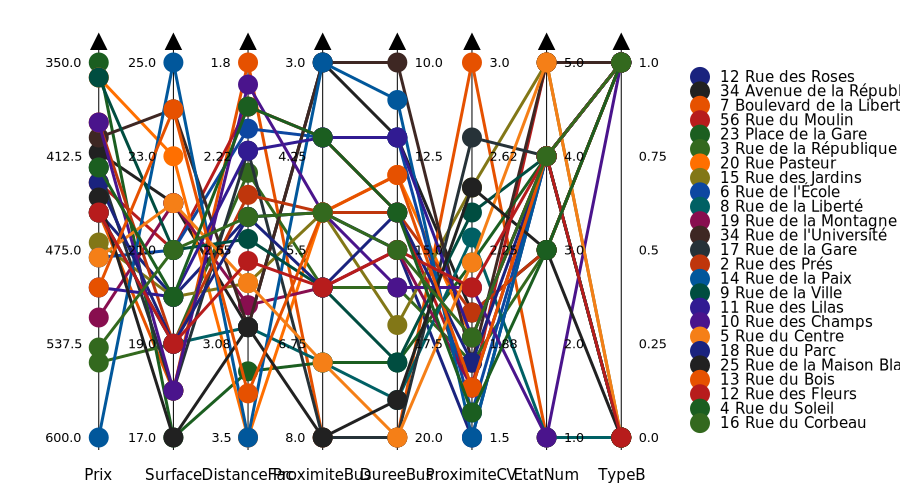

In [10]:
display(MIME("image/svg+xml"), criteriaPlot(alt; scales = scales, alternativeNames = nom, plotSize = (900,500)))

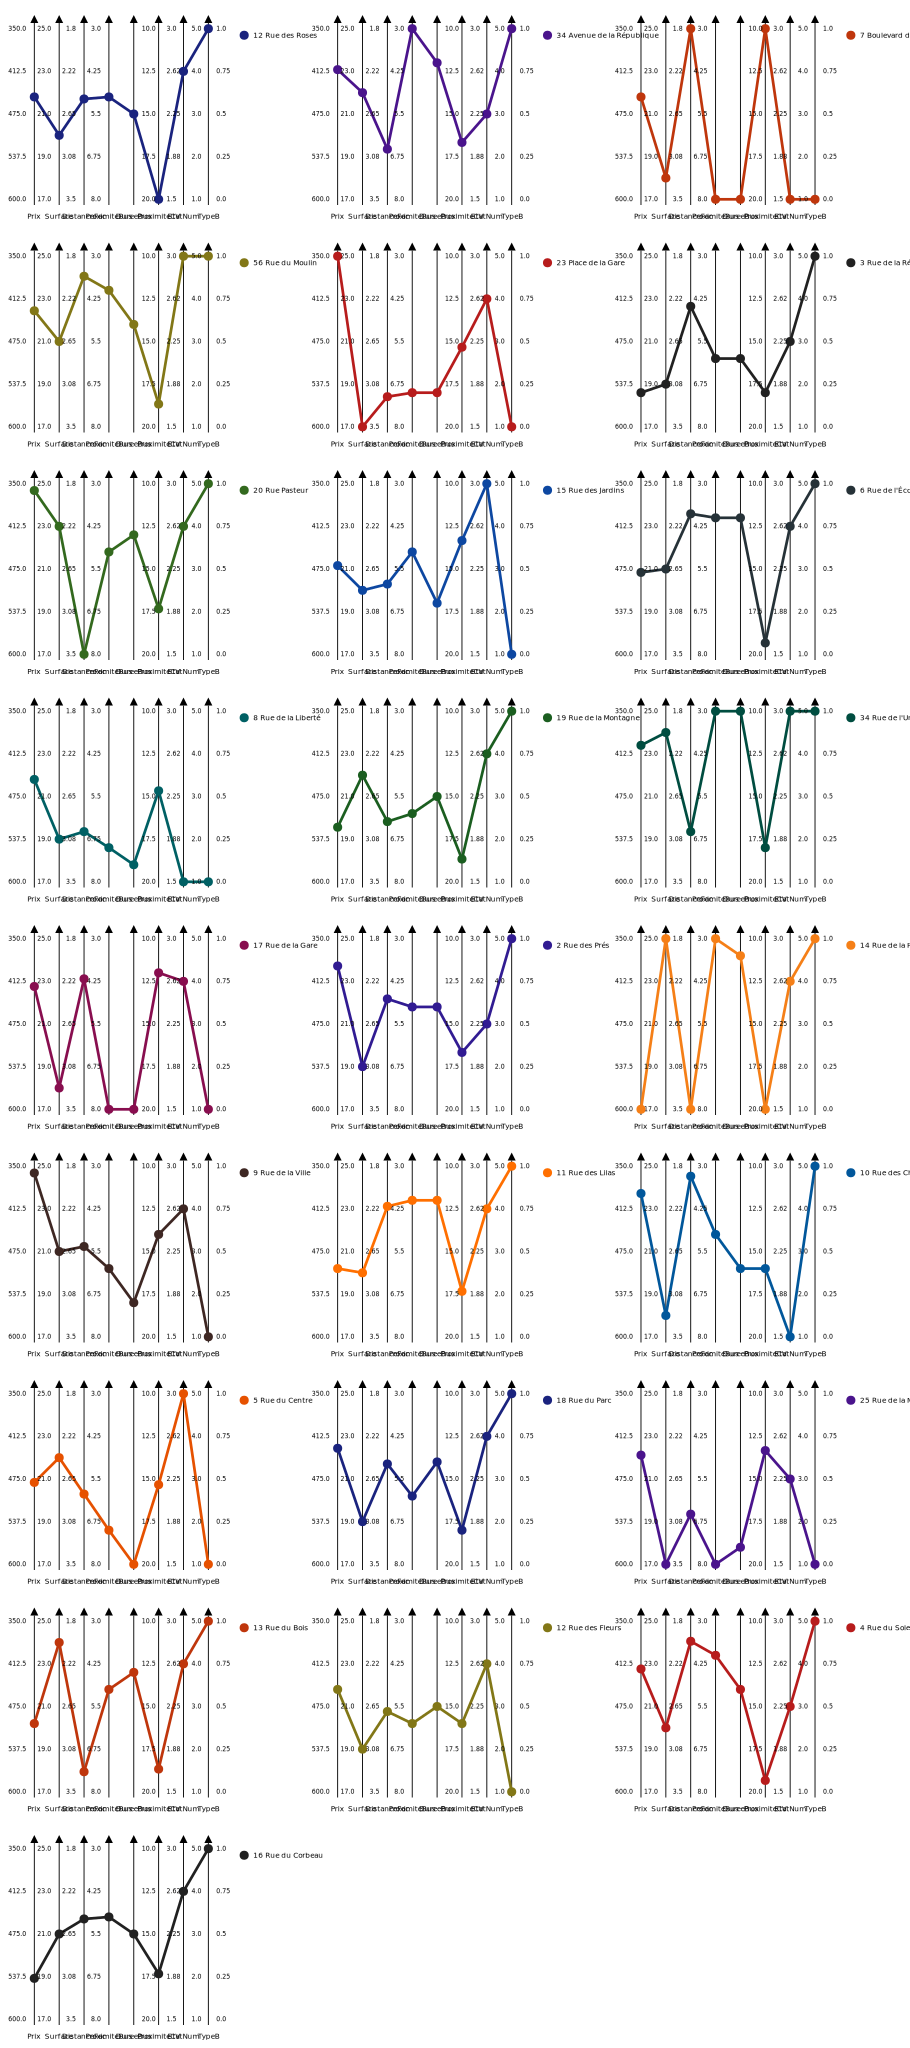

In [11]:
display(MIME("image/svg+xml"), criteriaPlot(alt; scales = scales, alternativeNames = nom, plotSize = (1000,250), individual = true, columns = 3))

A présent nous allons normalisé les données.

In [12]:
alt_norm  = normalize(alt)

Row,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,EtatNum,TypeB
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.4,0.375,0.411765,0.4,0.5,0.0,0.75,1.0
2,0.24,0.625,0.705882,0.0,0.2,0.333333,0.5,1.0
3,0.4,0.125,0.0,1.0,1.0,1.0,0.0,0.0
4,0.32,0.5,0.117647,0.2,0.4,0.133333,1.0,1.0
5,0.0,0.0,0.823529,0.8,0.8,0.466667,0.75,0.0
6,0.8,0.25,0.294118,0.6,0.6,0.2,0.5,1.0
7,0.04,0.75,1.0,0.4,0.3,0.266667,0.75,1.0
8,0.48,0.375,0.588235,0.4,0.7,0.666667,1.0,0.0
9,0.52,0.5,0.176471,0.2,0.2,0.0666667,0.75,1.0


## Méthode 1 : Somme pondérée a poids égale 

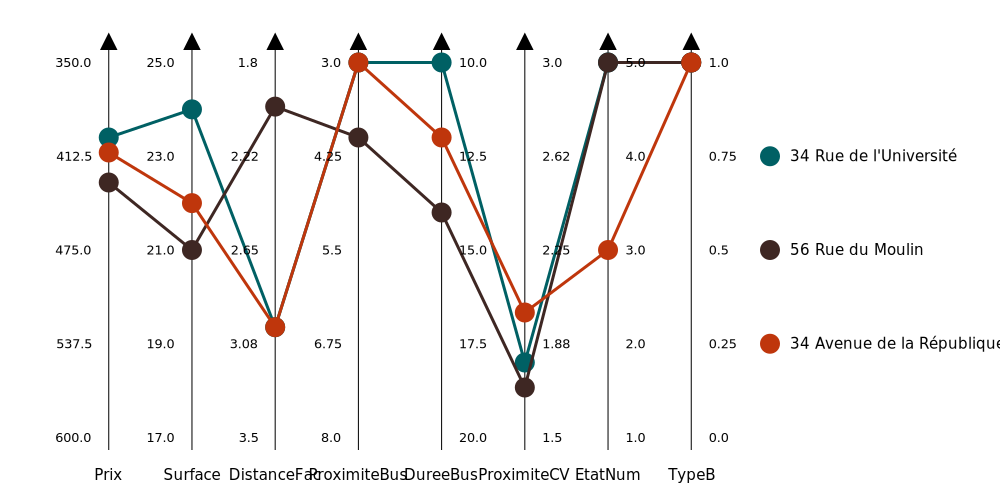

In [116]:
ws =  weightedSum(alt_norm, scales = scales)
ws_order =  weightedSumSort(alt_norm, scales = scales)
display(MIME("image/svg+xml"),criteriaPlot(alt; rows = ws_order[1:3], scales = scales, alternativeNames = nom[ws_order[1:3]], plotSize = (1000,500)))

In [121]:
data_ws = hcat(data[ws_order,:],DataFrame("weightedSum"=> ws[ws_order]))

Row,Adresse,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,EtatNum,TypeB,weightedSum
,String31,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Int64,Float64
1,34 Rue de l'Université,400,24,3.0,3,10,1.8,5,1,0.27114
2,56 Rue du Moulin,430,21,2.0,4,14,1.7,5,1,0.199461
3,34 Avenue de la République,410,22,3.0,3,12,2.0,3,1,0.164056
4,6 Rue de l'École,480,21,2.1,4,12,1.6,4,1,0.152525
5,11 Rue des Lilas,500,20,2.2,4,12,1.9,4,1,0.144547
6,20 Rue Pasteur,360,23,3.5,5,13,1.9,4,1,0.128333
7,4 Rue du Soleil,420,20,2.0,4,14,1.6,3,1,0.118002
8,2 Rue des Prés,390,19,2.4,5,14,2.0,3,1,0.096299
9,14 Rue de la Paix,600,25,3.5,3,11,1.5,4,1,0.08125


Le logement situé a ``34 Rue de l'Université`` est premier.

## Méthode 2 : Somme pondérée a poids inégale 

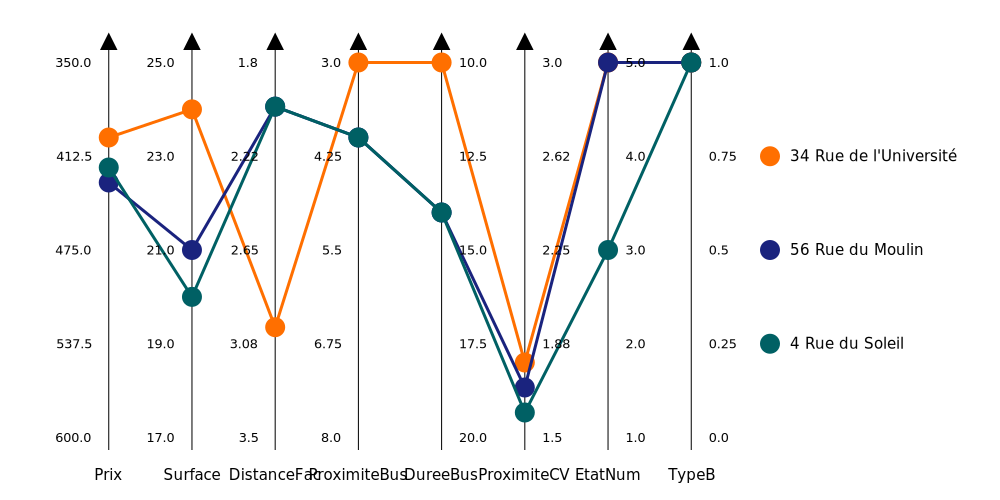

In [123]:
poids = [0.4,   # Prix 
         0.025,   # Surface 
         0.2,   # DistanceFac 
         0.1,   # ProximiteBus 
         0.2,   # DureeBus 
         0.025,   # ProximiteCV 
         0.025,   # EtatNum 
         0.025]   # TypeB 

ws1 =  weightedSum(alt_norm, scales = scales, weights=poids)
ws_order1 =  weightedSumSort(alt_norm, scales = scales, weights=poids)
display(MIME("image/svg+xml"),criteriaPlot(alt; rows = ws_order1[1:3], scales = scales, alternativeNames = nom[ws_order1[1:3]], plotSize = (1000,500)))

In [124]:
data_ws1 = hcat(data[ws_order1,:],DataFrame("weightedSum"=> ws1[ws_order1]))

Row,Adresse,Prix,Surface,DistanceFac,ProximiteBus,DureeBus,ProximiteCV,EtatNum,TypeB,weightedSum
,String31,Int64,Int64,Float64,Int64,Int64,Float64,Int64,Int64,Float64
1,34 Rue de l'Université,400,24,3.0,3,10,1.8,5,1,-0.144301
2,56 Rue du Moulin,430,21,2.0,4,14,1.7,5,1,-0.185696
3,4 Rue du Soleil,420,20,2.0,4,14,1.6,3,1,-0.186988
4,10 Rue des Champs,390,18,1.9,5,16,2.1,1,1,-0.19764
5,2 Rue des Prés,390,19,2.4,5,14,2.0,3,1,-0.202505
6,34 Avenue de la République,410,22,3.0,3,12,2.0,3,1,-0.215718
7,6 Rue de l'École,480,21,2.1,4,12,1.6,4,1,-0.245377
8,20 Rue Pasteur,360,23,3.5,5,13,1.9,4,1,-0.246833
9,9 Rue de la Ville,360,21,2.6,6,18,2.4,4,0,-0.283868


Le logement situé a ``34 Rue de l'Université``  reste toujours le premier.

## Méthode 3 : Electre III

In [ ]:
electreIII = getElectreIIIDistillations(alt_norm, criteriaWeights=poids, scales=scales)

(Any[[4, 12, 16, 17], [24], [18], [2, 14], [7], [13], [20], [1], [23], [3, 5], [9], [8, 21], [10], [19, 22], [11, 25], [6], [15]], Any[[5, 16], [7], [14, 18], [12], [2], [24], [4], [9], [17], [13], [20], [3, 21, 23], [8, 25], [11], [15], [19], [1, 6, 10, 22]])

In [ ]:
rank_asc = Dict()
for (rank, group) in enumerate(electreIII[1])
    for alt in group
        rank_asc[alt] = rank
    end
end

ranking_df = DataFrame(
    Alternative = nom,
    Rank_Ascendant = [get(rank_asc, i, missing) for i in 1:length(nom)]
)
sort!(ranking_df, :Rank_Ascendant)

Row,Alternative,Rank_Ascendant
,String31,Int64
1,56 Rue du Moulin,1
2,34 Rue de l'Université,1
3,9 Rue de la Ville,1
4,11 Rue des Lilas,1
5,4 Rue du Soleil,2
6,10 Rue des Champs,3
7,34 Avenue de la République,4
8,2 Rue des Prés,4
9,20 Rue Pasteur,5


In [19]:
indices = findall(x -> x in ranking_df[1:3, 1], nom) # recupéré les indices des trois premiers alternative
println(indices)

[4, 12, 16]


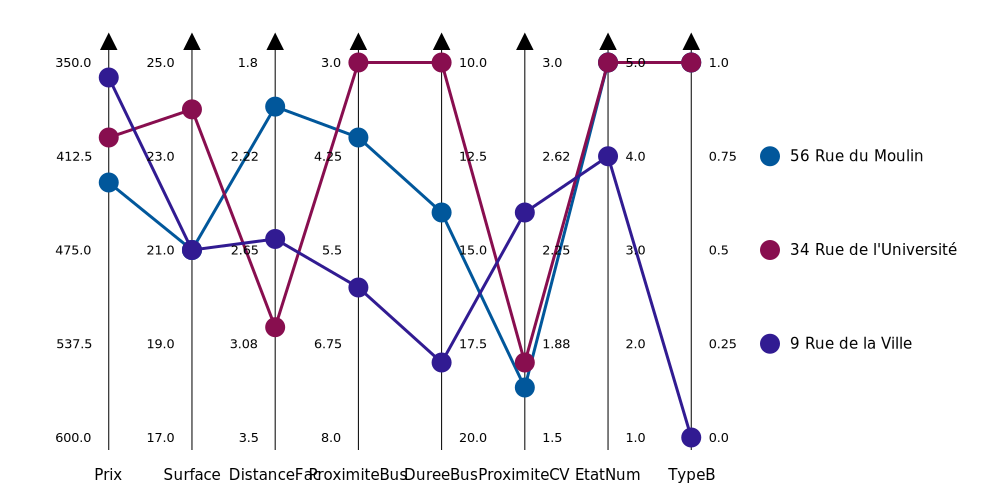

In [20]:
display(MIME("image/svg+xml"),criteriaPlot(alt; rows = indices, scales = scales, alternativeNames = nom[indices], plotSize = (1000,500)))

Selon cette  méthode logement situé à ``34 Rue de l'Université`` figure parmi les logement qui occupe la première place.

In [21]:
R = getElectreIIIRanking(alt, criteriaWeights=poids, scales=scales)

25×25 BitMatrix:
 0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 1  0  1  0  0  1  0  1  1  1  1  0  1  0  1  0  0  0  1  1  1  1  1  0  1
 0  0  0  0  0  1  0  1  0  1  1  0  0  0  1  0  0  0  1  0  1  1  0  0  1
 1  0  1  0  0  1  0  1  1  1  1  0  1  0  1  0  1  0  1  1  1  1  1  0  1
 0  0  1  0  0  1  0  1  1  1  1  0  0  0  1  0  0  0  1  0  1  1  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  1  0  1  1  1  1  0  1  0  1  0  0  0  1  1  1  1  1  0  1
 0  0  0  0  0  1  0  0  0  1  1  0  0  0  1  0  0  0  1  0  0  1  0  0  1
 0  0  0  0  0  1  0  1  0  1  1  0  0  0  1  0  0  0  1  0  1  1  0  0  1
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  0  1  0  1  1  1  1  0  1  0  1  0  1  0  1  1  1  1  1  1  1
 1  0  1  0  0  1  0  1  0  1  1  0  0  0  1  0  0  0  1  1  1  1  1  0  1
 1  1  1

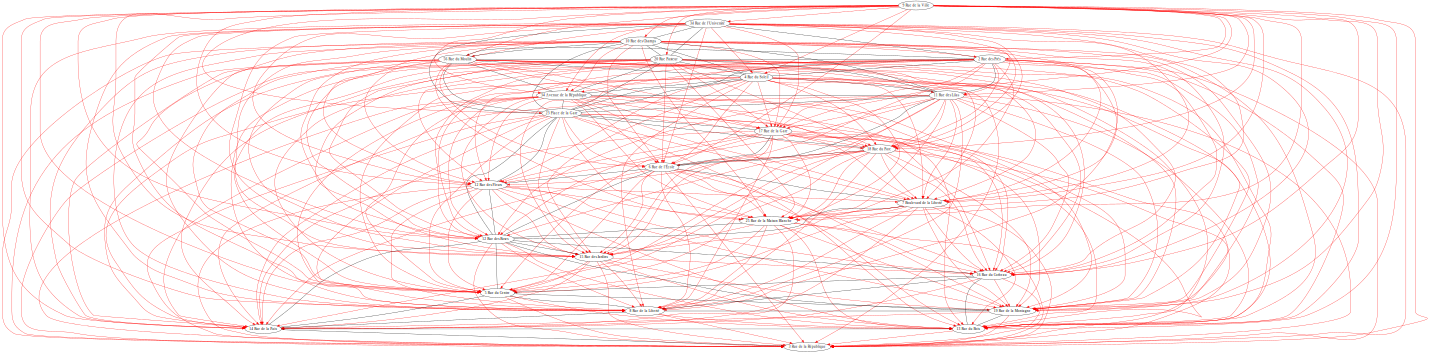

In [22]:
p = plotPreferenceRelations(R; plotSize = (20,20), alternativeNames = nom) 
display(MIME("image/svg+xml"), p)